##### CIS 242

## Spring 2020

## HOMEWORK ASSIGNMENT 9


Please compile your responses use markdown in your Jupyter notebook to answer the questions.  If you prefer, you may also submit a Word or PDF document with the responses along the PDF or HTML version of the completed notebook.   

#### Active notebooks (.ipynb files) or raw code (.py files) will NOT be accepted and no points will be given.

The code part of the files will not be graded, but they will be checked if necessary to verify your findings and recommendations. Point deductions may occur if there are major discrepancies between your written answers and the output from the code. 

Please organize your notebook to have the homework responses at the top and the working code underneath.

Questions are worth 2 points each for a total of **20 points**.  

## Clustering crime - continuted.

Remember, you have been hired as a consultant to help the FBI understand how to best support local law enforcement to keep crime rates down.  The FBI has the ability to start one crime prevention program and wants to identify which states are similar enough to benefit from the same program.  They have asked you to help with that identification process.  There is no requirement that the states be located near each other but they need to have similar "profiles". 

The CrimeData.csv file contains data on state level crime in 2014 from the Unified Crime Report from the FBI.  It also contains some other state level information such as population, unemployment rates, and average hourly wages. Definitions for the crime variables can be found here: https://www.ucrdatatool.gov/offenses.cfm

You have done some preliminary clustering and now it's time to investigate further. 

#### 1.  Recall your investigation from HW #8.  Recreate or describe your "best" clustering analysis.  Why did you choose this one?

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
crimes = pd.read_csv('CrimeData.csv')

crimes = crimes.set_index('State')

In [2]:
crimes.head()

,Population,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,Unemployment rate,Average Hourly Wage
State,,,,,,,,,,,
Alabama,4849377,5.70,29.60,41.30,96.90,283.40,819.00,2149.50,209.10,6.10,19.66
Alaska,736732,5.60,75.30,104.70,85.40,440.20,427.60,2096.40,236.00,6.50,25.98
Arizona,6731484,4.70,36.60,50.20,92.80,252.10,647.10,2289.10,261.30,6.10,21.43
Arkansas,2966369,5.60,39.80,59.40,69.10,346.00,835.70,2313.50,188.80,5.00,18.24
California,38802500,4.40,21.60,29.70,125.50,236.60,522.30,1527.40,391.30,6.20,25.91


In [3]:
from sklearn.preprocessing import StandardScaler
crimes_num_z = pd.DataFrame(StandardScaler().fit_transform(crimes), columns = crimes.columns, index = crimes.index)

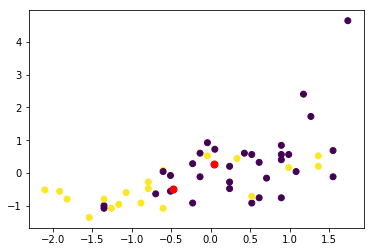

In [5]:
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids

crimes_kmd2 = KMedoids(n_clusters = 2).fit(crimes_num_z)
crimes = crimes.assign(kmed=crimes_kmd2.labels_)
plt.scatter(crimes_num_z['Unemployment rate'], crimes_num_z['Murder and nonnegligent manslaughter rate'], c=crimes.kmed)
plt.scatter(crimes_kmd2.cluster_centers_[:, 0], crimes_kmd2.cluster_centers_[:, 1], c='red', s=50)
plt.show()

I chose the K medoids method because it seems to yield more centrally located cluster center points since unlike the K mean, it doesn't take the mean value of the object in the cluster. This means that it is less affected by outliers than K mean.

#### 2. Draw a dendrogram for the crime data.  What changes do you need to make to the data, if any?

In [6]:
from scipy.spatial.distance import cdist

#create a matrix with Euclidean distances for all observations
dis_matrix = pd.DataFrame(cdist(crimes_num_z.values, crimes_num_z.values, metric = 'euclidean'), columns = crimes_num_z.index, index = crimes_num_z.index)

#code borrowed from Professor Cannon's Module:Clustering lecture.

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
import scipy.spatial.distance as ssd
# convert the redundant n*n square matrix form into a condensed nC2 array
distArray = ssd.squareform(dis_matrix) # distArray[{n choose 2}-{n-i choose 2} + (j-i-1)] is the distance between points i and j

#code borrowed from Professor Cannon's Module:Clustering lecture.

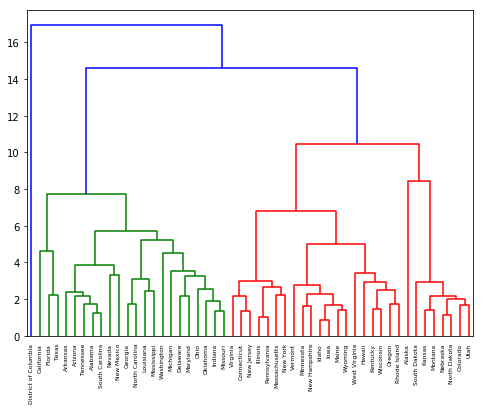

In [8]:
np.random.seed(123)
linked = linkage(distArray, 'ward')
plt.figure(figsize=(8, 6))
dendrogram(linked, labels = dis_matrix.columns)
plt.show()

#code borrowed from Professor Cannon's Module:Clustering lecture.

No changes were needed to be made to the data itself, besides calcualting the Eucledian distance between each data point and creating a dissimilarity matrix.

#### 3. What distance measure did you use?  Why?

As we can see in the K medoids scatter plot in question 1, there are some "outliers" that are especially farther away from the rest of the data points. This can presumably affect the result of methods such as single, complete, average, and centroid linkage. Because ward's method minimizes the total within-cluster variance, I would assume it is less affected by outliers and therefore I chose the ward method to measure distance.

#### 4. How do the clusters from the AGNES algorithm compare with the ones from the k-based clustering approach?  Similarities?  Differences? 

Differences: AGNES is a hierarchical agglomerative clustering while K-based clustering is a partitioning approach. AGNES also only passes through the data set once, whereas K-based clustering iterates through the data set until max-iteration is reached.

Similarities: Both algorithms start with each record as its own cluster (bottom-up approach). In each step, the two clusters with the smallest distance are merged.

*referenced Professor Cannon's Module:Clustering lecture.

#### 5. Draw two additional dendrograms using different distance measures.  Do they suggest a different number of clusters?  

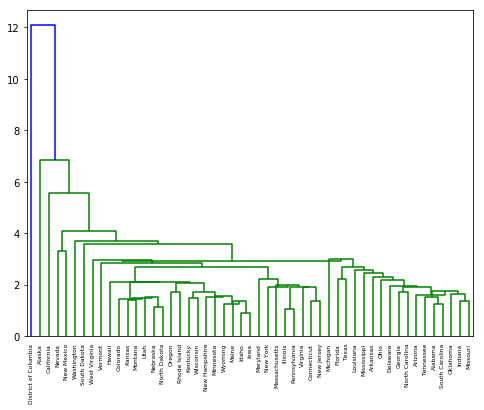

In [9]:
np.random.seed(123)
linked = linkage(distArray, 'centroid')
plt.figure(figsize=(8, 6))
dendrogram(linked, labels = dis_matrix.columns)
plt.show()

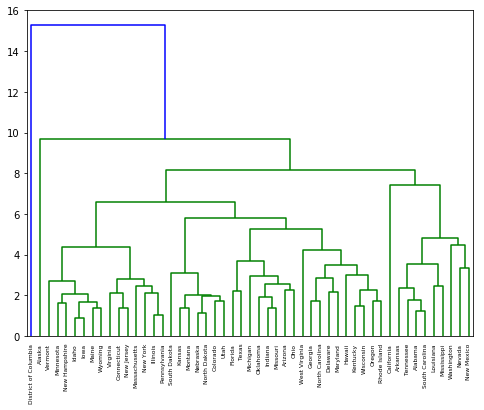

In [10]:
np.random.seed(123)
linked = linkage(distArray, 'complete')
plt.figure(figsize=(8, 6))
dendrogram(linked, labels = dis_matrix.columns)
plt.show()

The dendrogram itself doesn't tell or suggest us how many clusters we should have, as the questions asks. Rather, we choose where to cut horizontally depending on how many clusters we decide to have. That being said, the ward dendrogram offers the clearest picture of clusters. The complete dendrogram also offers a relatively clear picture of cluster, while it's hard to say the same for the centroid dendrogram.

*reference material: https://www.displayr.com/what-is-dendrogram/ and Professos Cannon's Module: Clustering lecture.

#### 6. Do the hierarchical models suggest a different K than you chose previously?  What will you do with that information?

In the previous assignment, we concluded that K=2 is the ideal number of clusters. Based on the heights of the links, the ward dendrogram seems to suggest 3 clusters, while the centroid and complete dendrograms seem to suggest 2 or 3 depending on where we want to cut horizontally. With these three hierarchical models, we can estimate that the ideal K is 2 or 3. With this information, we can test with K=2 and K=3.

#### 7.  Of the clusters produced by your "best" model, which cluster would you recommend for the FBI program?  Why?

Based on my previous answers, I will be using the ward dendrogram as my best model. Since we entertained the notion of trying K=2 and K=3, let's start with K=2 first.

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
crimes_km = KMeans(n_clusters = 2, random_state = 1234)
kmeans_out = crimes_km.fit_predict(crimes_num_z)
crimes = crimes.assign(kmeans=crimes_km.labels_)

In [12]:
print(np.bincount(crimes_km.labels_))

[21 30]


In [13]:
Clusters = pd.DataFrame(crimes_km.cluster_centers_, columns = crimes_num_z.columns).T

In [14]:
Clusters.sort_values(by = [0], ascending = False)

,0,1
Burglary rate,0.94,-0.66
Aggravated assault rate,0.80,-0.56
Murder and nonnegligent manslaughter rate,0.75,-0.52
Unemployment rate,0.68,-0.48
Larceny-theft rate,0.67,-0.47
Motor vehicle theft rate,0.66,-0.46
Robbery rate,0.48,-0.34
Revised rape rate /2,0.44,-0.31
Legacy rape rate /1,0.38,-0.27
Population,0.28,-0.20


When we run with two clusters (K=2), I would recommend the first cluster, cluster '0', to the FBI because it has a much higher crime rate across all types of crime compared to the second cluster. Since the objective is to implement a crime prevention program, it makes sense to implement in in a cluster containing states with higher crime rates across different types of crime. Now let's examine when K=3.

In [15]:
crimes_km = KMeans(n_clusters = 3, random_state = 1234)
kmeans_out = crimes_km.fit_predict(crimes_num_z)
crimes = crimes.assign(kmeans=crimes_km.labels_)

In [16]:
print(np.bincount(crimes_km.labels_))

[21 29  1]


In [17]:
Clusters = pd.DataFrame(crimes_km.cluster_centers_, columns = crimes_num_z.columns).T

In [18]:
Clusters.sort_values(by = [0], ascending = False)

,0,1,2
Burglary rate,0.98,-0.71,-0.01
Unemployment rate,0.59,-0.49,1.74
Aggravated assault rate,0.58,-0.55,3.62
Murder and nonnegligent manslaughter rate,0.52,-0.54,4.65
Larceny-theft rate,0.46,-0.49,4.59
Motor vehicle theft rate,0.45,-0.46,3.84
Population,0.36,-0.23,-0.79
Revised rape rate /2,0.35,-0.32,2.06
Legacy rape rate /1,0.31,-0.30,2.14
Robbery rate,0.21,-0.36,5.93


When K=3, I would recommend thie third cluster, cluster '2', to the FBI because it has higher crime rates across almost all crime types, except for in burglary rate. One interesting thing to note is that while the cluster chosed in K=2 has a lower average hourly wage, the cluster chosen in K=3 actually has a higher average hourly wage. Unemployment rate also happens to be higher in the third cluster, which makes intuitive sense because jobs that pay higher wages also require more skilled people rather than simply more people. This might indicate a large wealth disparity with the majority of the state residents are on the low income class, which could lead to higher crime rates.

#### 8. Investigate the principle components for the data set.  What changes, if any, do you need to make to the dataset?

Since we do not have any categorical varaibles, we do not need to change any of them into dummy varaibles. We also already normalized our data using standard scaler so there are no changes that need to be made to our data.

In [19]:
from sklearn.decomposition import PCA

df = pd.DataFrame(crimes_num_z)
pca_crimes = PCA().fit(df)
pca_crimes_trans = pca_crimes.transform(df)

#code borrowed from Professor Cannon's Module:Clustering lecture.

In [20]:
crimes.drop(columns=["kmed", "kmeans"], inplace = True)

In [21]:
total_var = 0

for column in crimes:
    total_var += crimes[column].var()
    
print('Total variance: ', total_var)

Total variance:  50751450278800.11


In [22]:
for column in crimes:
    print(column+":", round(crimes[column].var(), 3), '\n','% of total variability: ', 
          round((crimes[column].var()/total_var), 3))
    print('')

Population: 50751449981794.07 
 % of total variability:  1.0

Murder and nonnegligent manslaughter rate: 6.343 
 % of total variability:  0.0

Legacy rape rate /1: 128.714 
 % of total variability:  0.0

Revised rape rate /2: 233.195 
 % of total variability:  0.0

Robbery rate: 5659.357 
 % of total variability:  0.0

Aggravated assault rate: 12168.846 
 % of total variability:  0.0

Burglary rate: 33013.213 
 % of total variability:  0.0

Larceny-theft rate: 236124.67 
 % of total variability:  0.0

Motor vehicle theft rate: 9659.042 
 % of total variability:  0.0

Unemployment rate: 1.164 
 % of total variability:  0.0

Average Hourly Wage: 11.502 
 % of total variability:  0.0



Population apparently explains all of the variability, probably because more densely poepulated states also have higher crime rates, so let's drop population column to see how the variability of the other variables change.

In [23]:
crimes_2 = crimes.drop(columns = ['Population'])
total_var_2 = 0

for column in crimes_2:
    total_var_2 += crimes_2[column].var()
    
print('Total variance: ', total_var_2)

Total variance:  297006.0448569412


In [27]:
for column in crimes_2:
    print(column+":", round(crimes_2[column].var(), 3), '\n','% of total variability: ', 
          round((crimes_2[column].var()/total_var_2), 3))
    print('')

Murder and nonnegligent manslaughter rate: 6.343 
 % of total variability:  0.0

Legacy rape rate /1: 128.714 
 % of total variability:  0.0

Revised rape rate /2: 233.195 
 % of total variability:  0.001

Robbery rate: 5659.357 
 % of total variability:  0.019

Aggravated assault rate: 12168.846 
 % of total variability:  0.041

Burglary rate: 33013.213 
 % of total variability:  0.111

Larceny-theft rate: 236124.67 
 % of total variability:  0.795

Motor vehicle theft rate: 9659.042 
 % of total variability:  0.033

Unemployment rate: 1.164 
 % of total variability:  0.0

Average Hourly Wage: 11.502 
 % of total variability:  0.0



With this, we identify 'Larcency-theft rate' that account of 79.5% of the total variability and 'Burglary rate' that account of 11.1% of the total variability as the two principal components.

#### 9. How much variation is explained by the first and second coponents?  How many components does it take to explain 85% of the variability in the data?

As explored in question 8, 90.6% of the total variability is explained by the first(Larcency-theft rate) and second (Burglary rate) components. So it takes two components to explain 85% of the variaiblity in the data.

#### 10. Investigate the loadings.  What do they mean? Can you guess how to interpret the first two principle components? 

In [28]:
pcs = PCA().fit(pd.DataFrame([crimes_2["Larceny-theft rate"], crimes_2["Burglary rate"]]).T)
print(pcs.explained_variance_ratio_)

[0.91772944 0.08227056]


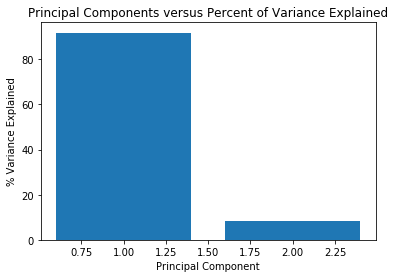

In [29]:
plt.bar(np.arange(1,3,1), pcs.explained_variance_ratio_*100)
plt.xlabel("Principal Component")
plt.ylabel("% Variance Explained")
plt.title("Principal Components versus Percent of Variance Explained")
plt.show()

In [30]:
pcs.components_

array([[ 0.97552683,  0.21988042],
       [ 0.21988042, -0.97552683]])

The loadings for the first principal component are (0.876, −0.22), and the loadings for the second principal component are (0.22, 0.976).

As discussed in question 9, the first principal component explains 90.6% of the variability in the data set. I we are to reduce this two dimensional data set down to one dimensional, we would use the first principal component (Larcency-theft rate).

## Working code below

All working code is shown under each question.